## Çoklu Doğrusal Regresyon ile Reklamların Satışa Etkisi

Elimizde farklı reklam kaynaklarına yapılan harcamalar ve satış mikrtarlarını gösteren bir veri seti var. Regresyon modeli oluşturarak hangi reklem kanalının satışlar üzerinde etkisinin daha fazla olduğunu belirleyeceğiz.

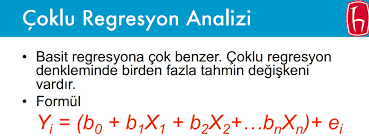

## Kütüphaneleri Yükle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Veri Dosyasını Yükle

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3073-49B7

 Directory of C:\Users\murat\Documents\ECO_Nov\ML

18.12.2024  20:19    <DIR>          .
16.12.2024  22:16    <DIR>          ..
16.12.2024  22:17    <DIR>          .ipynb_checkpoints
19.02.2024  21:11             4.063 advertising.csv
18.12.2024  20:19           129.358 €oklu Do§rusal Regresyon.ipynb
               2 File(s)        133.421 bytes
               3 Dir(s)   4.859.531.264 bytes free


In [3]:
df=pd.read_csv('advertising.csv')

## Veri ön işleme ve Veri Keşfi

In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Amaç: regresyon formülündeki değerleri (katsayıları) bulmak.
Satış= Sabit+ katsayı1*Tv+ katsayı2*Radio+ katsayı3*Newspaper + Hata

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: >

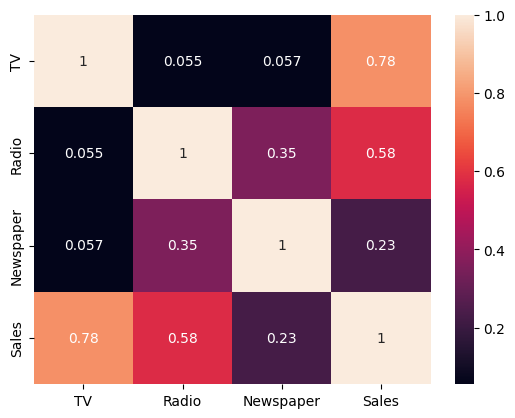

In [9]:
sns.heatmap(df.corr(), annot=True)

In [6]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [7]:
#Diğer kütüphanelerin yüklenmesi
#veri setini eğitim ve test olarak bölmek için kullanılan modül
from sklearn.model_selection import train_test_split


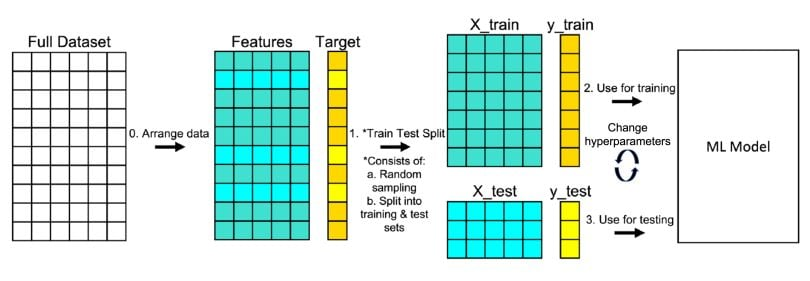

In [ ]:
#Ölçeklendirme yapmak için
from sklearn.preprocessing import StandardScaler as Scaler

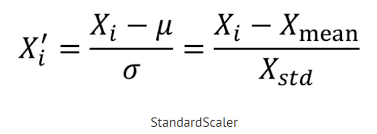

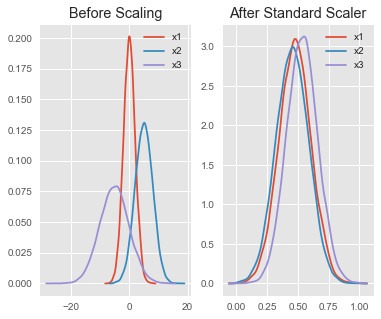

In [ ]:
#Lineer Regresyon modelini içe aktar
from sklearn.linear_model import LinearRegression


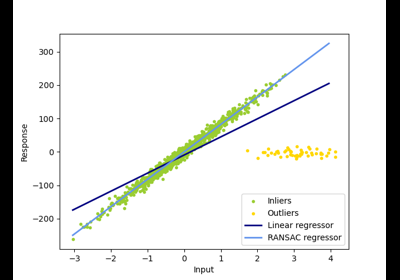

In [ ]:
#Modeli değerlendirmek için kullanılan metrikler
from sklearn.metrics import mean_squared_error, r2_score

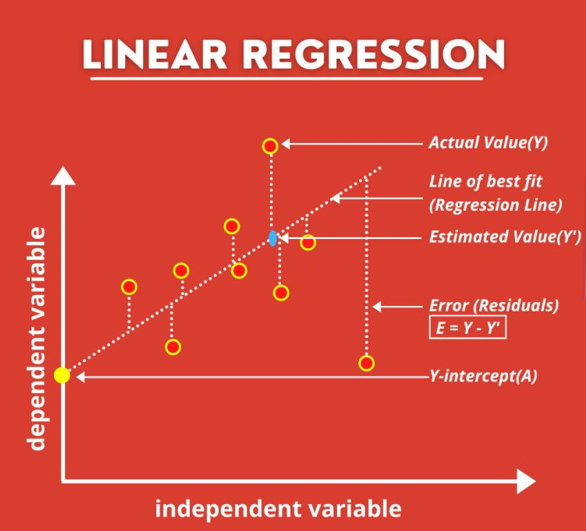

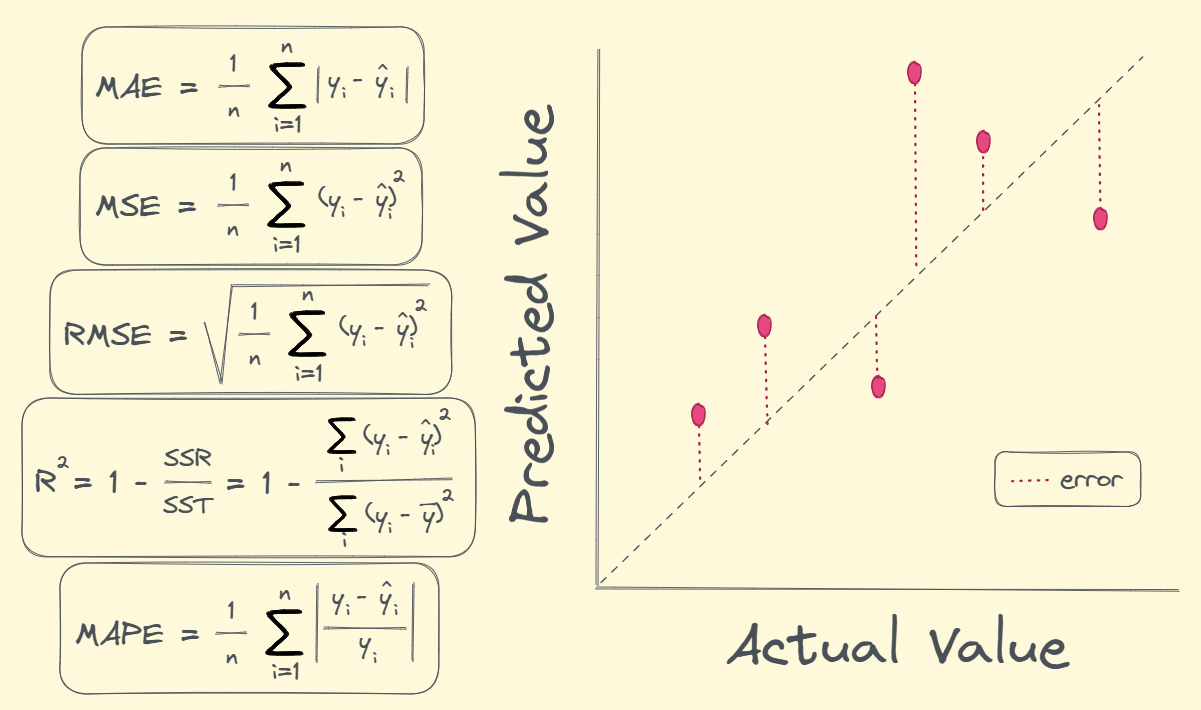

#### Özellikleri ve hedef sütunu belirle

In [8]:
X=df[['TV','Radio','Newspaper']] #X=df.drop('Sales',axis=1)
y=df['Sales']

#### Veri setinin bölünmesi

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=.2,
                                               random_state=42)

### Model Oluşturma

In [10]:
lr=LinearRegression()

#### Modelin Eğitimi

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

### Modelin Değerlendirlmesi : Tahmin Yapma

In [13]:
y_predict=lr.predict(X_test)

In [14]:
y_predict

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [15]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [16]:
model_predict=pd.DataFrame({'Gerçek':y_test,'Tahmin':y_predict})
model_predict

,Gerçek,Tahmin
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
115,12.6,13.105592
69,22.3,21.057192
170,8.4,7.461010
174,11.5,13.606346
45,14.9,15.155070


In [19]:
model_predict['Hata']=abs(model_predict['Gerçek']-model_predict['Tahmin'])
model_predict

,Gerçek,Tahmin,Hata
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,0.153843
158,7.3,10.608503,3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,2.106346
45,14.9,15.155070,0.255070


In [20]:
model_predict['Mape']=model_predict['Hata']/model_predict['Gerçek']
model_predict

,Gerçek,Tahmin,Hata,Mape
95,16.9,16.408024,0.491976,0.029111
15,22.4,20.889882,1.510118,0.067416
30,21.4,21.553843,0.153843,0.007189
158,7.3,10.608503,3.308503,0.453220
128,24.7,22.112373,2.587627,0.104762
115,12.6,13.105592,0.505592,0.040126
69,22.3,21.057192,1.242808,0.055731
170,8.4,7.461010,0.938990,0.111784
174,11.5,13.606346,2.106346,0.183161
45,14.9,15.155070,0.255070,0.017119


In [21]:
model_predict['Mape'].mean()

0.15198846602831226

In [22]:
#R2 Skoru +1 e ne kadar yakınsa o kadar iyidir
r2_score(y_test,y_predict)

0.899438024100912

In [25]:
# RMSE Skoru
import numpy as np
np.sqrt(mean_squared_error(y_test,y_predict))

1.78159966153345

In [28]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predict) # gerçek birimdeki hata

1.4607567168117603

In [30]:
model_predict.Hata.mean() # manule olarak da hesapladık

1.4607567168117603

In [31]:
#regresyon formülünün katsayıları ve sabit terimi
#sabit terim
lr.intercept_

2.979067338122629

In [35]:
X_test, y_test

(        TV  Radio  Newspaper
 95   163.3   31.6       52.9
 15   195.4   47.7       52.9
 30   292.9   28.3       43.2
 158   11.7   36.9       45.2
 128  220.3   49.0        3.2
 115   75.1   35.0       52.7
 69   216.8   43.9       27.2
 170   50.0   11.6       18.4
 174  222.4    3.4       13.1
 45   175.1   22.5       31.5
 66    31.5   24.6        2.2
 182   56.2    5.7       29.7
 165  234.5    3.4       84.8
 78     5.4   29.9        9.4
 186  139.5    2.1       26.6
 177  170.2    7.8       35.2
 56     7.3   28.1       41.4
 152  197.6   23.3       14.2
 82    75.3   20.3       32.5
 68   237.4   27.5       11.0
 124  229.5   32.3       74.2
 16    67.8   36.6      114.0
 148   38.0   40.3       11.9
 93   250.9   36.5       72.3
 65    69.0    9.3        0.9
 60    53.5    2.0       21.4
 84   213.5   43.0       33.8
 67   139.3   14.5       10.2
 125   87.2   11.8       25.9
 132    8.4   27.2        2.1
 9    199.8    2.6       21.2
 18    69.2   20.5       18.3
 55   198.

In [32]:
#katsayılar Tv Radio Gazete
lr.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [36]:
model_predict['Tahmin']

95     16.408024
15     20.889882
30     21.553843
158    10.608503
128    22.112373
115    13.105592
69     21.057192
170     7.461010
174    13.606346
45     15.155070
66      9.048320
182     6.653283
165    14.345545
78      8.903493
186     9.689590
177    12.164944
56      8.736284
152    16.265073
82     10.277596
68     18.831091
124    19.560367
16     13.251035
148    12.336207
93     21.306951
65      7.827403
60      5.809574
84     20.757532
67     11.981381
125     9.183496
132     8.506699
9      12.466468
18     10.003377
55     21.387671
75     12.249664
150    18.266615
104    20.137663
135    14.055140
137    20.854112
164    11.017444
76      4.568996
Name: Tahmin, dtype: float64

In [37]:
2.979067338122629+(0.04472952*163.3)+(0.18919505*31.6)+(0.00276111*52.9)

16.40802425312263

In [39]:
(0.00276111*52.9)

0.146062719

Gerçek değer 16.9 Formnül ile de tahmin ettik : 16.4080 çıktı

In [38]:
# İstatistiksel Model Olarak Açıklaması
import statsmodels.formula.api as sm
model=sm.ols(formula='Sales~TV+Radio+Newspaper',data=df).fit()
coef=model.params
fit=coef[0]+coef[1]*df.TV+coef[2]*df.Radio+coef[3]*df.Newspaper
res=df.Sales-fit
print(fit)
print(res)
print(model.summary())

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
         ...    
195     5.370342
196     8.165312
197    12.785921
198    23.767321
199    15.173196
Length: 200, dtype: float64
0      1.576026
1     -1.937855
2     -3.007671
3      0.902170
4     -0.288672
         ...   
195    2.229658
196    1.534688
197    0.014079
198    1.732679
199   -1.773196
Length: 200, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           1.58e-96
Time:                        22:11:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:               